# Identify the frauds using a Self Organizing Map

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
print(dataset)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
print(X)

     CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
5      15571121   0  15.83   0.585   2   8   8  1.500   1   1    2    0    2   
6      15726466   1  17.42   6.500   2   3   4  0.125   0   0    0    0    2   
7      15660390   0  58.67   4.460   2  11   8  3.040   1   1    6    0    2   
8      15663942   1  27.83   1.000   1   2   8  3.000   0   0    0    0    2   
9      15638610   0  55.75   7.080   2   4   8  6.750   1   1    3    1    2   
10     15644446   1  33.50   1.750   2  14   8  4.500   1   1    4    1    2   
11     15585892   1  41.42   5.000   2  

In [4]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

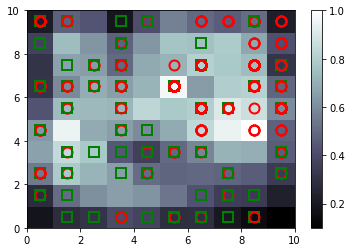

In [5]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize=10,
         markeredgewidth=2
        )
show()

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,6)], mappings[(8,4)]),axis=0)
frauds = sc.inverse_transform(frauds)
#frauds = pd.DataFrame(frauds)
print(frauds)

[[1.5662854e+07 0.0000000e+00 2.9580000e+01 1.7500000e+00 1.0000000e+00
  4.0000000e+00 4.0000000e+00 1.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5610042e+07 0.0000000e+00 2.0420000e+01 1.0500000e+01 1.0000000e+00
  1.4000000e+01 8.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.5400000e+02 3.3000000e+01]
 [1.5568162e+07 0.0000000e+00 1.9500000e+01 1.6500000e-01 2.0000000e+00
  1.1000000e+01 4.0000000e+00 4.0000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 3.8000000e+02 1.0000000e+00]
 [1.5745375e+07 0.0000000e+00 3.3080000e+01 1.6250000e+00 2.0000000e+00
  2.0000000e+00 4.0000000e+00 5.4000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5638983e+07 0.0000000e+00 5.6830000e+01 4.2500000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 5.0000000e+00 0.0000000e+00 0.

# Going from unsupervised learning to supervised learning

Creating the matrix of features

In [9]:
customers = dataset.iloc[:,1:].values

Creating the dependent variable

In [14]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1
print(is_fraud)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

## Training the ANN

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
classifier.fit(customers, is_fraud, verbose=1, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 1s 2ms/step - loss: 0.3768 - acc: 0.9536
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.1377 - acc: 0.9536


## Predicting the probabilities of fraud

In [30]:
y_pred = classifier.predict(customers)

In [31]:
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)
y_pred = y_pred[y_pred[:,1].argsort()]
print(pd.DataFrame(y_pred))

              0         1
0    15699340.0  0.000225
1    15571415.0  0.000250
2    15621423.0  0.000329
3    15778589.0  0.000365
4    15585855.0  0.000374
5    15684440.0  0.000403
6    15644400.0  0.000406
7    15570947.0  0.000426
8    15602456.0  0.000464
9    15697310.0  0.000482
10   15675176.0  0.000495
11   15665374.0  0.000496
12   15589881.0  0.000515
13   15777994.0  0.000522
14   15661412.0  0.000531
15   15728082.0  0.000549
16   15641715.0  0.000558
17   15571284.0  0.000559
18   15790113.0  0.000591
19   15622507.0  0.000614
20   15592326.0  0.000635
21   15671293.0  0.000636
22   15597536.0  0.000636
23   15768449.0  0.000652
24   15796787.0  0.000654
25   15642098.0  0.000669
26   15706602.0  0.000680
27   15778290.0  0.000690
28   15697844.0  0.000756
29   15664083.0  0.000761
..          ...       ...
660  15664720.0  0.170253
661  15800554.0  0.172395
662  15734578.0  0.174020
663  15567919.0  0.174550
664  15606554.0  0.175180
665  15643056.0  0.176397
666  1566215